# ПРОЕКТ: Определение стоимости автомобилей

https://github.com/AnnaPresnova/determining-the-cost-of-a-car

**Описание проекта:** сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В нашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. 

**Цель задачи:** построить модель для определения стоимости автомобиля и выбрать лучшую по следующим параметрам:

- качество предсказания;

- скорость предсказания;

- время обучения.

**Этапы выполнения проекта:** 

1. Подготовка данных (загрузка данных и предобработка):

* Изучение данных 

* Заполнение пропущенных значений

* обработка аномалий в столбцах

2. Подготовка выборок для обучения моделей

3. Обучение моделей:

* модель случайного леса

* модель градиентного бустинга с помощью алгоритма LightGBM

* анализ  времени обучения, времени предсказания и качества перечисленных моделей на валидационных выборках

4. Анализ моделей: выбор лучшей модели, проверка её качества на тестовой выборке.

5. Вывод

**Описание данных:**

*Признаки*:

DateCrawled — дата скачивания анкеты из базы

VehicleType — тип автомобильного кузова

RegistrationYear — год регистрации автомобиля

Gearbox — тип коробки передач

Power — мощность (л. с.)

Model — модель автомобиля

Kilometer — пробег (км)

RegistrationMonth — месяц регистрации автомобиля

FuelType — тип топлива

Brand — марка автомобиля

Repaired — была машина в ремонте или нет

DateCreated — дата создания анкеты

NumberOfPictures — количество фотографий автомобиля

PostalCode — почтовый индекс владельца анкеты (пользователя)

LastSeen — дата последней активности пользователя

Целевой признак

Price — цена (евро)

In [1]:
# импортируем необходимые библиотеки

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

import time

from lightgbm import LGBMRegressor

import lightgbm as lgb

from sklearn. preprocessing import OneHotEncoder

## Подготовка данных

In [2]:
# загрузим и изучим данные

df = pd.read_csv('/datasets/autos.csv')

df.head(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


In [3]:
# посмотрим информацию о датафрейме 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

Мы имеем датафрейм,состоящий из 16 столбцов(признаков) и 354_369 строк (наблюдений). В некоторых столбцах есть пропущенные значения: VehicleType (тип кузова), Gearbox(тип КПП), model (модель), Fueltype (тип топлива), Repaired(авто отремонтирован или нет). Посмотрим каждый из этих признаков по-отдельности.

In [4]:
# приводим даты к корректному типу данных

date_cols = ['DateCrawled', 'DateCreated']

df[date_cols] = df[date_cols].astype("datetime64[ns]")

# для расчета возраста авто вытаскиваем год из даты

df.loc[:, 'DateCreated'] = df.loc[:, 'DateCreated'].dt.year

df['DateCreated'] = df['DateCreated'].astype('int')

df['age_auto'] = df['DateCreated'] -df['RegistrationYear']

In [5]:
# проверяем статистические данные количественных столбцов

df.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,DateCreated,NumberOfPictures,PostalCode,age_auto
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,2015.999924,0.0,50508.689087,11.765476
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.009046,0.0,25783.096248,90.227958
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,2014.000000,0.0,1067.000000,-7983.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,2016.000000,0.0,30165.000000,8.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,2016.000000,0.0,49413.000000,13.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,2016.000000,0.0,71083.000000,17.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,2016.000000,0.0,99998.000000,1016.000000


Следует обратить внимание:

1. признак цены, вероятно, имеет серьезные аномалии или несколько очень высоких значений (на это нам указывает большая разница между медианой и средним значением, а также высокое стандартное отклонение), кроме этого минимальная цена равна 0, 

2. в значениях года регистрации авто есть опечатки, т к максимальное значение указано - 9999 год, а минимальное - 1000, 

3. признак мощности двигателя имеет также слишком высокое макисмальное значение - 20 000, наличие аномальных значений также подтверждает высокое стандартное отклонение, 

4. в значениях пробега видим, что не менее 50% значений имеет пробег 150_000. 

5. Возраст авто имеет очень высокое стандартное отклонение, т е есть аномалии. Также Есть отрицательное значение возраста авто и очень большое значение максимального возраста авто.

Далее построим диаграммы размаха и гистограммы, чтобы разобраться подробнее.

In [6]:
# Чтобы разобраться с пропущенными значениями, посмотрим каждый признак по-отдельности

# какие типы кузовов имеются в датафрейме

df['VehicleType'].value_counts()

sedan          91457
small          79831
wagon          65166
bus            28775
convertible    20203
coupe          16163
suv            11996
other           3288
Name: VehicleType, dtype: int64

Самостоятельно определить тип кузова в пропущенных строках не удастся, поэтому меняем на 'other'.

In [7]:
# заменим пропущенные значения на 'other'

df['VehicleType'] = df['VehicleType'].fillna('other')

In [8]:
# посмотрим, какие типы КПП есть в датафрейме

df['Gearbox'].value_counts()

manual    268251
auto       66285
Name: Gearbox, dtype: int64

In [9]:
# заменим пропущенные значения на 'other'

df['Gearbox'] = df['Gearbox'].fillna('other')

In [10]:
# посмотрим, какие модели присутствуют в датафрейме

df['Model'].value_counts()

golf                  29232
other                 24421
3er                   19761
polo                  13066
corsa                 12570
                      ...  
i3                        8
serie_3                   4
rangerover                4
serie_1                   2
range_rover_evoque        2
Name: Model, Length: 250, dtype: int64

Разновидностей моделей, конечно же, очень много. 

In [11]:
# проверим количество пропущенных моделей.

df['Model'].isna().sum()

19705

Пропущено более 5% моделей авто, этот признак существенно влияет на цену авто, и количество пропущенных значений немаленькое. Но заполнять нам нечем, поэтому заменяем на 'other'. 

In [12]:
# заменим также на 'other'

df['Model'] = df['Model'].fillna('other')

In [13]:
# проверим, какие типы топлива есть в датапфрейме

df['FuelType'].value_counts()

petrol      216352
gasoline     98720
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: FuelType, dtype: int64

In [14]:
# снова меняем на 'other'

df['FuelType'] = df['FuelType'].fillna('other')

In [15]:
# был ли авто в ремонте

df['Repaired'].value_counts()

no     247161
yes     36054
Name: Repaired, dtype: int64

На этот вопрос сможет ответить только владелец, поэтому:

In [16]:
# меняем на 'other'

df['Repaired'] = df['Repaired'].fillna('other')

In [17]:
#Все пропущенные значения заменили, проверим:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        354369 non-null  datetime64[ns]
 1   Price              354369 non-null  int64         
 2   VehicleType        354369 non-null  object        
 3   RegistrationYear   354369 non-null  int64         
 4   Gearbox            354369 non-null  object        
 5   Power              354369 non-null  int64         
 6   Model              354369 non-null  object        
 7   Kilometer          354369 non-null  int64         
 8   RegistrationMonth  354369 non-null  int64         
 9   FuelType           354369 non-null  object        
 10  Brand              354369 non-null  object        
 11  Repaired           354369 non-null  object        
 12  DateCreated        354369 non-null  int64         
 13  NumberOfPictures   354369 non-null  int64   

<AxesSubplot:>

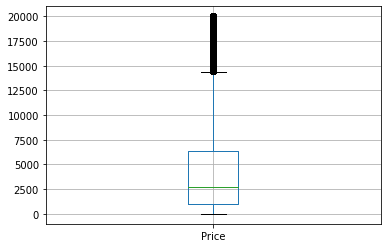

In [18]:
# строим диаграмму размаха по целевому признаку - Цена авто

df.boxplot('Price')

Свыше 14 000 евро наблюдаются выбросы, также смущает, что есть цены, равные нули.

In [19]:
# посмотрим строки, в которых цены равны нулю

df.loc[df['Price'] == 0]

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen,age_auto
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016,0,19348,2016-03-25 16:47:58,36
40,2016-03-26 22:06:17,0,other,1990,other,0,corsa,150000,1,petrol,opel,other,2016,0,56412,2016-03-27 17:43:34,26
111,2016-03-19 18:40:12,0,other,2017,manual,0,golf,5000,12,petrol,volkswagen,other,2016,0,21698,2016-04-01 08:47:05,-1
115,2016-03-20 18:53:27,0,small,1999,other,0,other,5000,0,petrol,volkswagen,other,2016,0,37520,2016-04-07 02:45:22,17
152,2016-03-11 18:55:53,0,bus,2004,manual,101,meriva,150000,10,lpg,opel,yes,2016,0,27432,2016-03-12 23:47:10,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354205,2016-03-09 15:56:30,0,other,2000,manual,65,corsa,150000,0,other,opel,yes,2016,0,23758,2016-03-30 11:16:08,16
354238,2016-03-20 14:55:07,0,small,2002,manual,60,fiesta,150000,3,petrol,ford,other,2016,0,33659,2016-04-06 18:45:23,14
354248,2016-03-24 13:48:05,0,small,1999,manual,53,swift,150000,3,petrol,suzuki,other,2016,0,42329,2016-04-07 05:17:24,17
354277,2016-03-10 22:55:50,0,small,1999,manual,37,arosa,150000,7,petrol,seat,yes,2016,0,22559,2016-03-12 23:46:32,17


Таких данных около 3%, вероятно, это опечатки. Такие данные нам не нужны. Удалим их.

In [20]:
df = df.loc[df['Price'] != 0]

Text(0.5, 0, 'Цена')

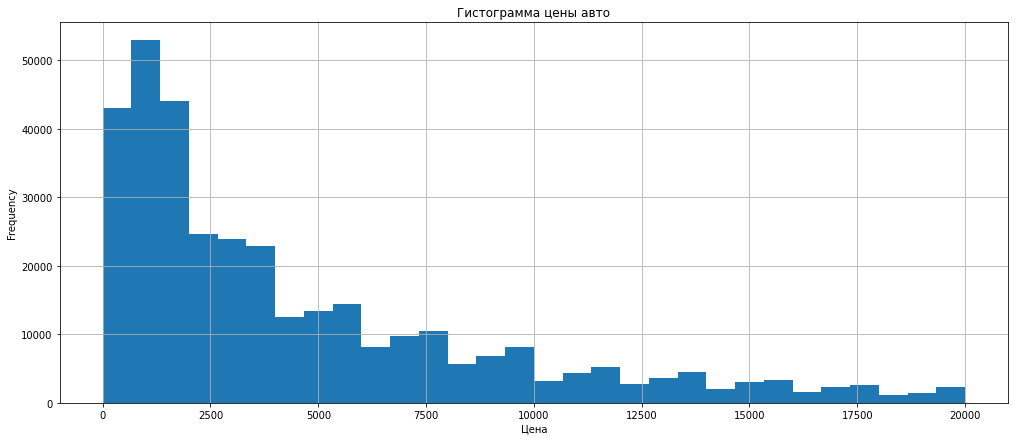

In [21]:
# построим гистограмму по Цене

df['Price'].plot(kind='hist', title='Гистограмма цены авто', bins=30, figsize=(17,7), grid='True').set_xlabel('Цена')



Пик значений приходится на цену свыше 0 и  до 600 евро. Гистограмма не имеет нормального распределения, у неее длинный хвост с очень высокими значениями. Но мы не будем удалять аномальные значения, так как это целевой показатель.

In [22]:
# проверим параметр - год регистрации авто, 

# сначала посмотрим строки с годом 9999

(df['RegistrationYear'] == 9999).sum()

18

In [23]:
df.loc[df['RegistrationYear'] == 9999]

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen,age_auto
17271,2016-03-23 16:43:29,700,other,9999,other,0,other,10000,0,other,opel,other,2016,0,21769,2016-04-05 20:16:15,-7983
28390,2016-04-05 08:57:08,799,other,9999,other,0,3er,10000,4,petrol,bmw,other,2016,0,72116,2016-04-07 12:17:50,-7983
28965,2016-04-04 22:54:47,18000,other,9999,other,0,a_klasse,10000,0,petrol,mercedes_benz,other,2016,0,51379,2016-04-07 02:44:52,-7983
29426,2016-03-23 21:52:25,7999,other,9999,other,0,kaefer,10000,0,other,volkswagen,other,2016,0,47638,2016-04-06 03:46:40,-7983
50141,2016-03-14 22:54:43,50,other,9999,other,0,911,10000,0,other,porsche,other,2016,0,36211,2016-04-07 11:46:52,-7983
62395,2016-03-16 23:54:17,55,other,9999,other,0,other,10000,0,other,volkswagen,other,2016,0,38524,2016-03-20 07:46:23,-7983
128677,2016-03-14 14:51:56,1550,other,9999,other,95,other,10000,0,other,volkswagen,other,2016,0,35288,2016-03-16 04:48:21,-7983
149151,2016-04-02 18:57:33,400,other,9999,other,0,other,10000,0,other,sonstige_autos,other,2016,0,26441,2016-04-02 18:57:33,-7983
167937,2016-03-23 13:49:51,1000,other,9999,other,0,other,10000,0,other,mazda,other,2016,0,40822,2016-03-23 13:49:51,-7983
200525,2016-03-22 15:56:52,850,other,9999,other,0,other,10000,0,other,mazda,other,2016,0,40822,2016-03-22 15:56:52,-7983


Помимо того, что неверно указан год, так еще у многих из этих авто не указана модель, и ни у одного не указан тип кузова, тип КПП и мощность двигателя, всего количество авто с "9999" годом выпуска немного - 26 , удалим их.

In [24]:
df = df.loc[df['RegistrationYear'] != 9999]

In [25]:
# проверим, что получилось

df['RegistrationYear'].describe()

count    343579.000000
mean       2003.670946
std          52.915926
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9450.000000
Name: RegistrationYear, dtype: float64

In [26]:
df.loc[df['RegistrationYear'] > 2023]

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen,age_auto
12946,2016-03-29 18:39:40,49,other,5000,other,0,golf,5000,12,other,volkswagen,other,2016,0,74523,2016-04-06 04:16:14,-2984
15870,2016-04-02 11:55:48,1700,other,3200,other,0,other,5000,0,other,sonstige_autos,other,2016,0,33649,2016-04-06 09:46:13,-1184
17346,2016-03-06 16:06:20,6500,other,8888,other,0,other,10000,0,other,sonstige_autos,other,2016,0,55262,2016-03-30 20:46:55,-6872
18259,2016-03-16 20:37:54,300,other,2200,other,0,twingo,5000,12,other,renault,other,2016,0,45307,2016-04-07 06:45:32,-184
20159,2016-04-01 21:57:05,1600,other,4100,other,0,other,5000,0,other,sonstige_autos,other,2016,0,67686,2016-04-05 20:19:27,-2084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326556,2016-03-29 21:36:16,7999,other,5911,auto,75,golf,10000,0,other,volkswagen,other,2016,0,41462,2016-04-06 07:46:20,-3895
328453,2016-03-14 18:54:32,450,other,2500,other,0,6_reihe,5000,0,other,mazda,other,2016,0,45475,2016-03-19 07:17:39,-484
334967,2016-03-20 17:53:51,12000,other,4000,other,500,golf,5000,0,other,volkswagen,no,2016,0,57392,2016-04-07 00:46:30,-1984
338829,2016-03-24 19:49:36,50,other,3000,other,3000,golf,100000,6,other,volkswagen,yes,2016,0,23992,2016-04-03 13:17:57,-984


Снова остаются аномальные значения, ничего не остается, как ограничиться максимальным значением 2023 год. Так как данный признак значителен, и опечатки в нем нам не нужны.

In [27]:
df = df.loc[df['RegistrationYear'] <= 2023]

In [28]:
# также избавимся от значений года, ранее 1900 (можно было бы еще сузить диапазон, 
# но вдруг на этой площадке, действительно, представлены раритеты)

df = df.loc[df['RegistrationYear'] > 1900]

In [29]:
# избавимся от отрицательных значений возраста авто.

df = df.loc[df['age_auto'] >= 0]

<AxesSubplot:>

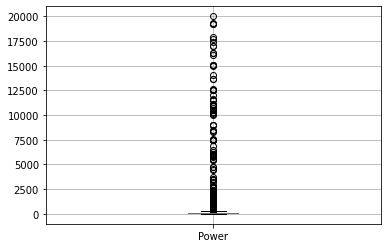

In [30]:
# построим диаграмму размаха по показателю Мощность двингателя

df.boxplot('Power')

Ничего не понятно, слишком много вылетов

Text(0.5, 0, 'Мощность двигателя')

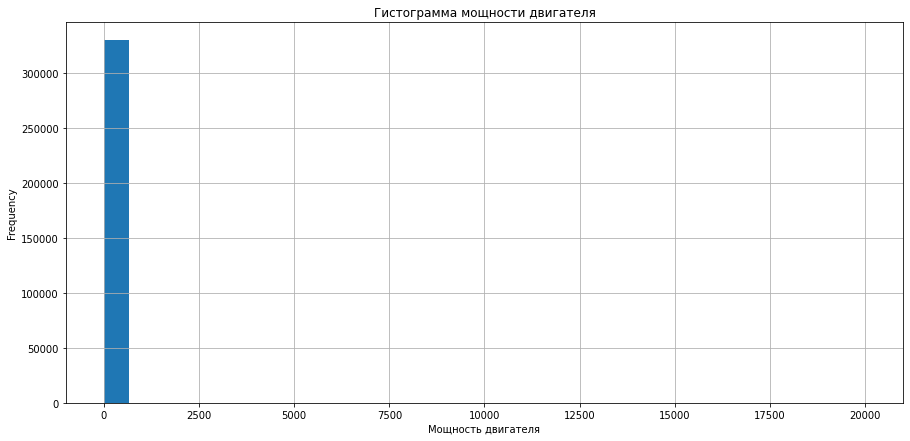

In [31]:
# строим гистограмму

df['Power'].plot(kind='hist', title='Гистограмма мощности двигателя', bins=30, figsize=(15,7), grid='True').set_xlabel('Мощность двигателя')

Вылеты даже не видны на гистограмме, удалим их.

In [32]:
# удостоверимся, что количество небольшое

(df['Power'] > 650).sum()

309

In [33]:
df = df.loc[df['Power'] < 650]

<AxesSubplot:>

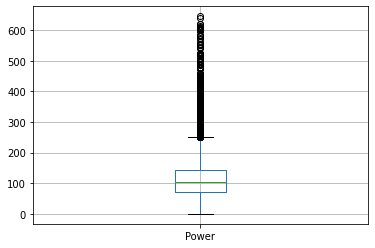

In [34]:
# проверим, как теперь выглядит диаграмма размаха

df.boxplot('Power')

Text(0.5, 0, 'Мощность двигателя')

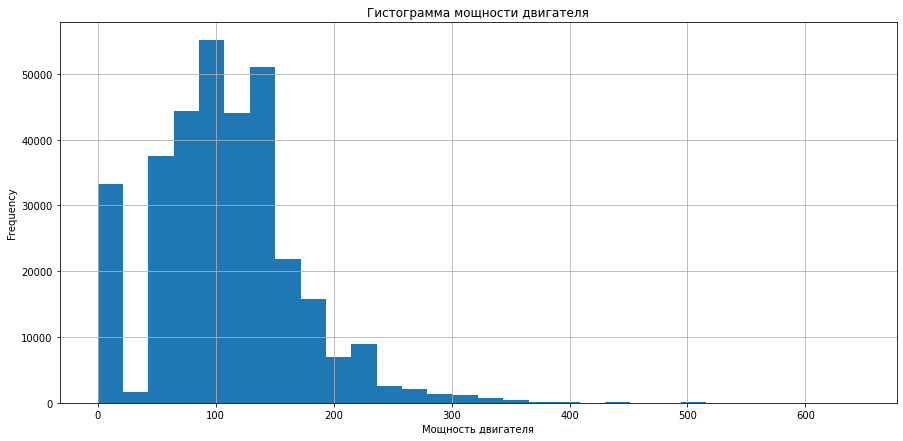

In [35]:
# и еще раз построим гистограмму

df['Power'].plot(kind='hist', title='Гистограмма мощности двигателя', bins=30, figsize=(15,7), grid='True').set_xlabel('Мощность двигателя')

In [36]:
# можем еще откинуть незначительное количество аномальных вылетов

df = df.loc[df['Power'] <= 250]

<AxesSubplot:>

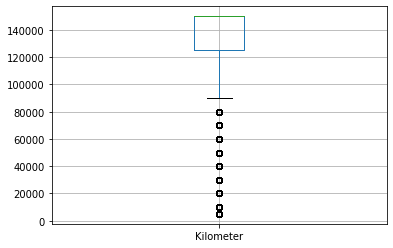

In [37]:
# построим диаграмму размаха по Пробегу авто

df.boxplot('Kilometer')

Text(0.5, 0, 'Пробег автомобиля')

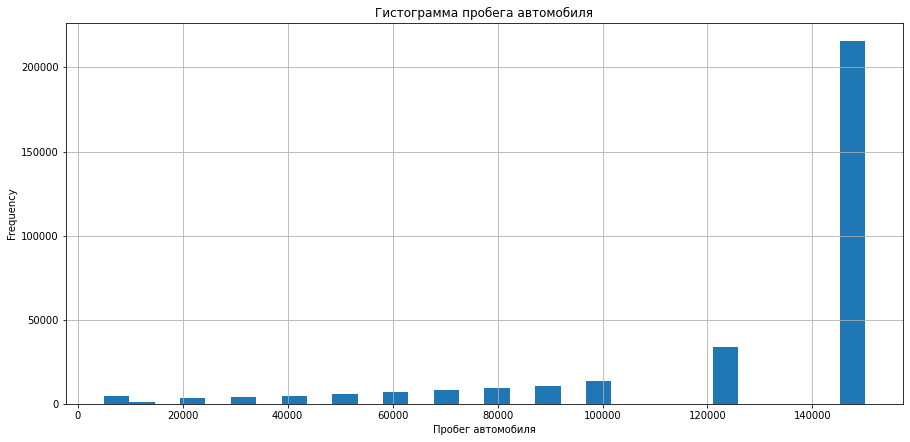

In [38]:
# построим гистограмму

df['Kilometer'].plot(kind='hist', title='Гистограмма пробега автомобиля', bins=30, figsize=(15,7), grid='True').set_xlabel('Пробег автомобиля')

Пробеги у машин могут быть разные, оставим все возможные варианты.

In [39]:
# проверим статастические данные после преобразований

df.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,DateCreated,NumberOfPictures,PostalCode,age_auto
count,322720.000000,322720.00000,322720.000000,322720.000000,322720.000000,322720.000000,322720.0,322720.000000,322720.000000
mean,4470.429199,2002.58679,104.428678,128111.846182,5.810721,2015.999919,0.0,50740.255782,13.413129
std,4425.501403,6.93254,55.852964,37603.200497,3.681520,0.009314,0.0,25761.646485,6.932560
min,1.000000,1910.00000,0.000000,5000.000000,0.000000,2014.000000,0.0,1067.000000,0.000000
25%,1200.000000,1999.00000,69.000000,125000.000000,3.000000,2016.000000,0.0,30455.000000,9.000000
50%,2800.000000,2003.00000,105.000000,150000.000000,6.000000,2016.000000,0.0,49596.000000,13.000000
75%,6450.000000,2007.00000,140.000000,150000.000000,9.000000,2016.000000,0.0,71277.000000,17.000000
max,20000.000000,2016.00000,250.000000,150000.000000,12.000000,2016.000000,0.0,99998.000000,106.000000


Статистические данные стали адекватнее.

В датафрейме насторожил признак 'NumberOfPictures' - кол-во изображений авто (видим одни нули), посмотрим, какие значения присутствуют в датафрейме.

In [40]:
df['NumberOfPictures'].value_counts()

0    322720
Name: NumberOfPictures, dtype: int64

Кроме нулей ничего нет. Этот признак в данной ситуации никакой роли не играет, удаляем его.

Также удалению подлежат все даты, месяц регистрации и индекс. Эти показатели не влияют на стоимость авто.

удаляем ненужные признаки

In [41]:
# удаляем ненужные признаки, а также удаляем Model, так как в дальнейшем после проведения OHE не хватит ресурсов для исполнения кода

df = df.drop(['NumberOfPictures', 'DateCrawled', 'DateCreated', 'LastSeen', 'RegistrationMonth', 'PostalCode', 'Model'], axis=1)

In [42]:
# проверим количество явных дубликатов.

df.duplicated().sum()

47894

In [43]:
# избавимся от них

df = df.drop_duplicates().reset_index(drop=True)

In [44]:
# проверим размер получившегося датафрейма

df.shape

(274826, 10)

In [45]:
# проверим информацию о получившемся датафрейме

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274826 entries, 0 to 274825
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             274826 non-null  int64 
 1   VehicleType       274826 non-null  object
 2   RegistrationYear  274826 non-null  int64 
 3   Gearbox           274826 non-null  object
 4   Power             274826 non-null  int64 
 5   Kilometer         274826 non-null  int64 
 6   FuelType          274826 non-null  object
 7   Brand             274826 non-null  object
 8   Repaired          274826 non-null  object
 9   age_auto          274826 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 21.0+ MB


Пропущенных значений нет, типы данных устраивают. Переходим к подготовке выборок для обучения моделей.

In [46]:
df.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Kilometer,FuelType,Brand,Repaired,age_auto
0,480,other,1993,manual,0,150000,petrol,volkswagen,other,23
1,18300,coupe,2011,manual,190,125000,gasoline,audi,yes,5
2,9800,suv,2004,auto,163,125000,gasoline,jeep,other,12
3,1500,small,2001,manual,75,150000,petrol,volkswagen,no,15
4,3600,small,2008,manual,69,90000,gasoline,skoda,no,8


## Подготовка выборок для обучения моделей

In [47]:
# для начала переведем все признаки в численные значения, для этого используем OHE кодирование

encoder = OneHotEncoder(handle_unknown='ignore')

df_ohe = pd.DataFrame(encoder.fit_transform(df[['VehicleType', 'Gearbox', 'FuelType', 'Brand', 'Repaired']]). toarray ())

df_final = df.join (df_ohe)

df_final.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Kilometer,FuelType,Brand,Repaired,age_auto,...,51,52,53,54,55,56,57,58,59,60
0,480,other,1993,manual,0,150000,petrol,volkswagen,other,23,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,18300,coupe,2011,manual,190,125000,gasoline,audi,yes,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,9800,suv,2004,auto,163,125000,gasoline,jeep,other,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1500,small,2001,manual,75,150000,petrol,volkswagen,no,15,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,3600,small,2008,manual,69,90000,gasoline,skoda,no,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [48]:
# удалим категориальные столбцы

df_final = df_final.drop(['VehicleType', 'Gearbox', 'FuelType', 'Brand', 'Repaired'], axis= 1)

df_final.head()

,Price,RegistrationYear,Power,Kilometer,age_auto,0,1,2,3,4,...,51,52,53,54,55,56,57,58,59,60
0,480,1993,0,150000,23,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,18300,2011,190,125000,5,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,9800,2004,163,125000,12,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1500,2001,75,150000,15,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,3600,2008,69,90000,8,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [49]:
# разделим датафрейм на признаки и целевой признак

features = df_final.drop(['Price'], axis=1)

target = df_final['Price']


In [50]:
# разделим получившиеся выборки на тренировочную, валидационную и тестовую в пропорции 60/20/20

# сначала отделяем тренировочную

features_train, features_valid_test, target_train, target_valid_test = train_test_split(features, target, test_size=0.4, random_state=12345)

# проверяем размер

print(features_train.shape)

target_train.shape

(164895, 65)


(164895,)

In [51]:
features_valid_test.shape 

(109931, 65)

In [52]:
# делим на валидационную и тестовую

features_valid, features_test, target_valid, target_test = train_test_split(features_valid_test, target_valid_test, test_size=0.5, random_state=12345)

# проверяем размеры

print(features_valid.shape)

print(target_valid.shape)

print(features_test.shape)

target_test.shape

(54965, 65)
(54965,)
(54966, 65)


(54966,)

In [53]:
# сравниваем  с размером датафрейма до разделения


features_shape = features_test.shape[0] + features_valid.shape[0] + features_train.shape[0]

features_shape

274826

Суммы совпадают, значит, разделение прошло успешно.

Переходим к обучению моделей.

## Обучение моделей

Мы будем обучать две модели - модель случайного леса для регресии и градиентный бустинг c алгоритмом LightGBM.

In [54]:
%%time 

# добавили параметр, который посчитает время предсказания

# первой обучается модель случайного леса

model_rfr = RandomForestRegressor(random_state=12345, n_estimators = 15, max_depth = 5)

model_rfr.fit(features_train, target_train)



CPU times: user 4.46 s, sys: 44.4 ms, total: 4.5 s
Wall time: 4.51 s


RandomForestRegressor(max_depth=5, n_estimators=15, random_state=12345)

In [55]:
%%time 

predictions_valid_rfr = model_rfr.predict(features_valid)


CPU times: user 48.5 ms, sys: 8.07 ms, total: 56.5 ms
Wall time: 63.4 ms


In [56]:
%%time 

result_valid_rfr = mean_squared_error(target_valid, predictions_valid_rfr) ** 0.5

print('RMSE модели случайного леса с количеством деревьев 15 и максимальной высотой дерева 5 оставляет:', result_valid_rfr)

RMSE модели случайного леса с количеством деревьев 15 и максимальной высотой дерева 5 оставляет: 2375.1070681757124
CPU times: user 0 ns, sys: 2.35 ms, total: 2.35 ms
Wall time: 1.37 ms


**Показатель RMSE составил 2375, время предсказания 62,1 мсек, а 
время обучения алгоритма составляет 4,61 сек.**

In [57]:
%%time

# обучим модель градиентного бустинга

# инициализируем модель, укажем число деревьев и максимальное число листьев

booster = lgb.LGBMModel(objective="regression", n_estimators=40, num_leaves=20)

# обучим модель

booster.fit(features_train, target_train, eval_set=[(features_valid, target_valid),], eval_metric="rmse")



[1]	valid_0's rmse: 4184.11	valid_0's l2: 1.75068e+07
[2]	valid_0's rmse: 3915.98	valid_0's l2: 1.53349e+07
[3]	valid_0's rmse: 3681.67	valid_0's l2: 1.35547e+07
[4]	valid_0's rmse: 3476.17	valid_0's l2: 1.20838e+07
[5]	valid_0's rmse: 3299.12	valid_0's l2: 1.08842e+07
[6]	valid_0's rmse: 3141.3	valid_0's l2: 9.86774e+06
[7]	valid_0's rmse: 3006.23	valid_0's l2: 9.03744e+06
[8]	valid_0's rmse: 2890.82	valid_0's l2: 8.35686e+06
[9]	valid_0's rmse: 2788.01	valid_0's l2: 7.77303e+06
[10]	valid_0's rmse: 2695.07	valid_0's l2: 7.26341e+06
[11]	valid_0's rmse: 2617	valid_0's l2: 6.84867e+06
[12]	valid_0's rmse: 2542.33	valid_0's l2: 6.46343e+06
[13]	valid_0's rmse: 2480.19	valid_0's l2: 6.15132e+06
[14]	valid_0's rmse: 2423.33	valid_0's l2: 5.87252e+06
[15]	valid_0's rmse: 2374.48	valid_0's l2: 5.63816e+06
[16]	valid_0's rmse: 2328.46	valid_0's l2: 5.42172e+06
[17]	valid_0's rmse: 2289.07	valid_0's l2: 5.23982e+06
[18]	valid_0's rmse: 2254.8	valid_0's l2: 5.08413e+06
[19]	valid_0's rmse: 222

LGBMModel(n_estimators=40, num_leaves=20, objective='regression')

In [58]:
%%time

# получим предсказания

predictions_valid_booster = booster.predict(features_valid)

CPU times: user 220 ms, sys: 10.9 ms, total: 231 ms
Wall time: 203 ms


In [59]:
%%time

result_valid_booster = mean_squared_error(target_valid, predictions_valid_booster) ** 0.5

print('RMSE модели градиентного бустера с алгоритмом LightGBM с количеством деревьев 40 и максимальным количеством листьев 20 cоставляет:', result_valid_booster)

RMSE модели градиентного бустера с алгоритмом LightGBM с количеством деревьев 40 и максимальным количеством листьев 20 cоставляет: 1905.9156823319302
CPU times: user 2.38 ms, sys: 215 µs, total: 2.59 ms
Wall time: 1.39 ms


**Показатель RMSE составил 1905, время предсказания 291 мсек, а время обучения алгоритма 3,1 сек. Кроме этого видим, что функция потерь уменьшается от шага к шагу, как и должно быть**.

Лучшие показатели RMSE показала модель градиентного бустинга, при этом показатель времени предсказания незначительно хуже, а времени обучения лучше, чем у модели случайного леса.


## Анализ моделей

На тестовой выборке проверим модели.

In [60]:
# модель случайного леса

predictions_test_rfr = model_rfr.predict(features_test)

result_test_rfr = mean_squared_error(target_test, predictions_test_rfr) ** 0.5

print('RMSE модели случайного леса с количеством деревьев 15 и максимальной высотой дерева 5 на тестовой выборке составляет:', result_test_rfr)

RMSE модели случайного леса с количеством деревьев 15 и максимальной высотой дерева 5 на тестовой выборке составляет: 2370.0448086778038


In [61]:
predictions_test_booster = booster.predict(features_test)

result_test_booster = mean_squared_error(target_test, predictions_test_booster) ** 0.5

print('RMSE модели LightGBM cоставляет:', result_test_booster)

RMSE модели LightGBM cоставляет: 1885.3976663223361


## Вывод

Для определения алгоритма предсказания цены автомобиля в проекте были использованы две модели регрессии: модель случайного леса и модель градиентного бустинга.
К каждой модели мы применили по 2 гиперпараметра, проверили время обучения и время предсказания.
Показатели, по которым проходила оценка следующие:
- качество предсказания;
- скорость предсказания;
- время обучения.

Обе модели обучились хорошо, переобучения и недообучения нет.

Показатели качества модели случайного леса составили: RMSE 2375, время предсказания 62,1 мсек, а 
время обучения алгоритма составляет 4,61 сек.

Показатели качества модели градиентного бустинга составили: RMSE 1905, время предсказания 291 мсек, а время обучения алгоритма 3,1 сек. 

Таким образом, лучшие показатели RMSE показала модель градиентного бустинга, обученная на алгоритме LightGBM, при этом показатель времени предсказания незначительно хуже, а времени обучения лучше, чем у модели случайного леса.

Предлагаем заказчику использовать при разработке приложения модель градиентного бустинга.